# Importy

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Dane

### Pobranie danych

In [3]:
DATA_FOLDER = os.path.join(os.getcwd(), 'dane')
datasets = {}

### Inflacja

In [18]:
data = pd.read_csv(os.path.join(DATA_FOLDER, 'Inflacja.csv'))
print(data.head())
inflation_dict = {data['rok'][i]: data['wartosc'][i] for i in range(len(data))}
inflation_dict

    rok  wartosc
0  2024    100.7
1  2023    111.4
2  2022    114.4
3  2021    105.1
4  2020    103.4


{2024: 100.7, 2023: 111.4, 2022: 114.4, 2021: 105.1, 2020: 103.4}

#### Mieszkania

In [6]:
data = pd.read_csv(os.path.join(DATA_FOLDER, 'Najem_mieszkania.csv'))
print(data.head())
datasets['Najem_mieszkania'] = data

    rok powierzchnia  wartosc
0  2024       0 - 40     3011
1  2024      40 - 59     3841
2  2024      60 - 89     5816
3  2023       0 - 40     2869
4  2023      40 - 59     3691


### Wynagrodzenie

In [7]:
data = pd.read_csv(os.path.join(DATA_FOLDER, 'Wynagrodzenie.csv'))
print(data.head())
datasets['Wynagrodzenie'] = data

    rok doswiadczenie     typ umowy  wartosc
0  2024        senior           uop    12032
1  2024        senior  zlecenie/b2b    26249
2  2024        junior           uop     5808
3  2024        junior  zlecenie/b2b     6648
4  2024           mid           uop     8514


### Zywnosc

In [8]:
data = pd.read_csv(os.path.join(DATA_FOLDER, 'Zywnosc.csv'), sep=';')
COLUMNS = ['nazwa_pozycja_2', 'opis_okres', 'wartosc']
data = data[COLUMNS]

# Uśrednij wartości dla każdej kategorii i okresu
data['opis_okres'] = data['opis_okres'].apply(lambda x: x.split(' ')[0])
average_data = data.groupby(['nazwa_pozycja_2', 'opis_okres'])['wartosc'].mean()
data = average_data.reset_index()

datasets['Zywnosc'] = data


## Wizualizacja

#### Mieszkania

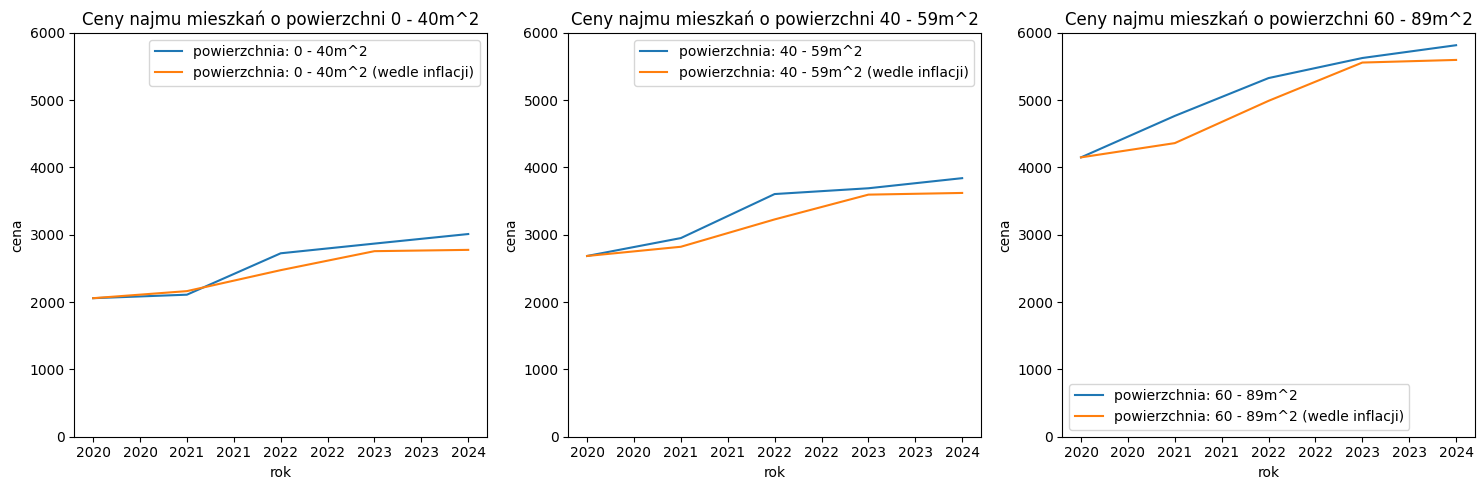

In [44]:
unique_areas = datasets["Najem_mieszkania"]['powierzchnia'].unique()
data = datasets["Najem_mieszkania"]

inflation_prices = {}
for i, area in enumerate(unique_areas, 0):
    area_data = data[data['powierzchnia'] == area]
    year_value_dict = {
        year: value for year, value in zip(area_data['rok'], area_data['wartosc'])
    }
    earliest_price = year_value_dict[min(year_value_dict.keys())]
    for year, value in sorted(year_value_dict.items())[1:]:
        earliest_price = round(earliest_price * (inflation_dict[year] / 100), 2)
        year_value_dict[year] = earliest_price
    inflation_prices[area] = year_value_dict
        

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

for i, area in enumerate(unique_areas, 0):
    area_data = data[data['powierzchnia'] == area]
    axs[i].plot(area_data['rok'], area_data['wartosc'], label=f'powierzchnia: {area}m^2')
    axs[i].plot(list(inflation_prices[area].keys()), list(inflation_prices[area].values()), label=f'powierzchnia: {area}m^2 (wedle inflacji)')
    axs[i].set_ylim(0, 6000)  # Setting y-axis range
    axs[i].set_xlabel('rok')
    axs[i].set_ylabel('cena')
    axs[i].set_title(f'Ceny najmu mieszkań o powierzchni {area}m^2')
    axs[i].xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    axs[i].legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#### Wynagrodzenie

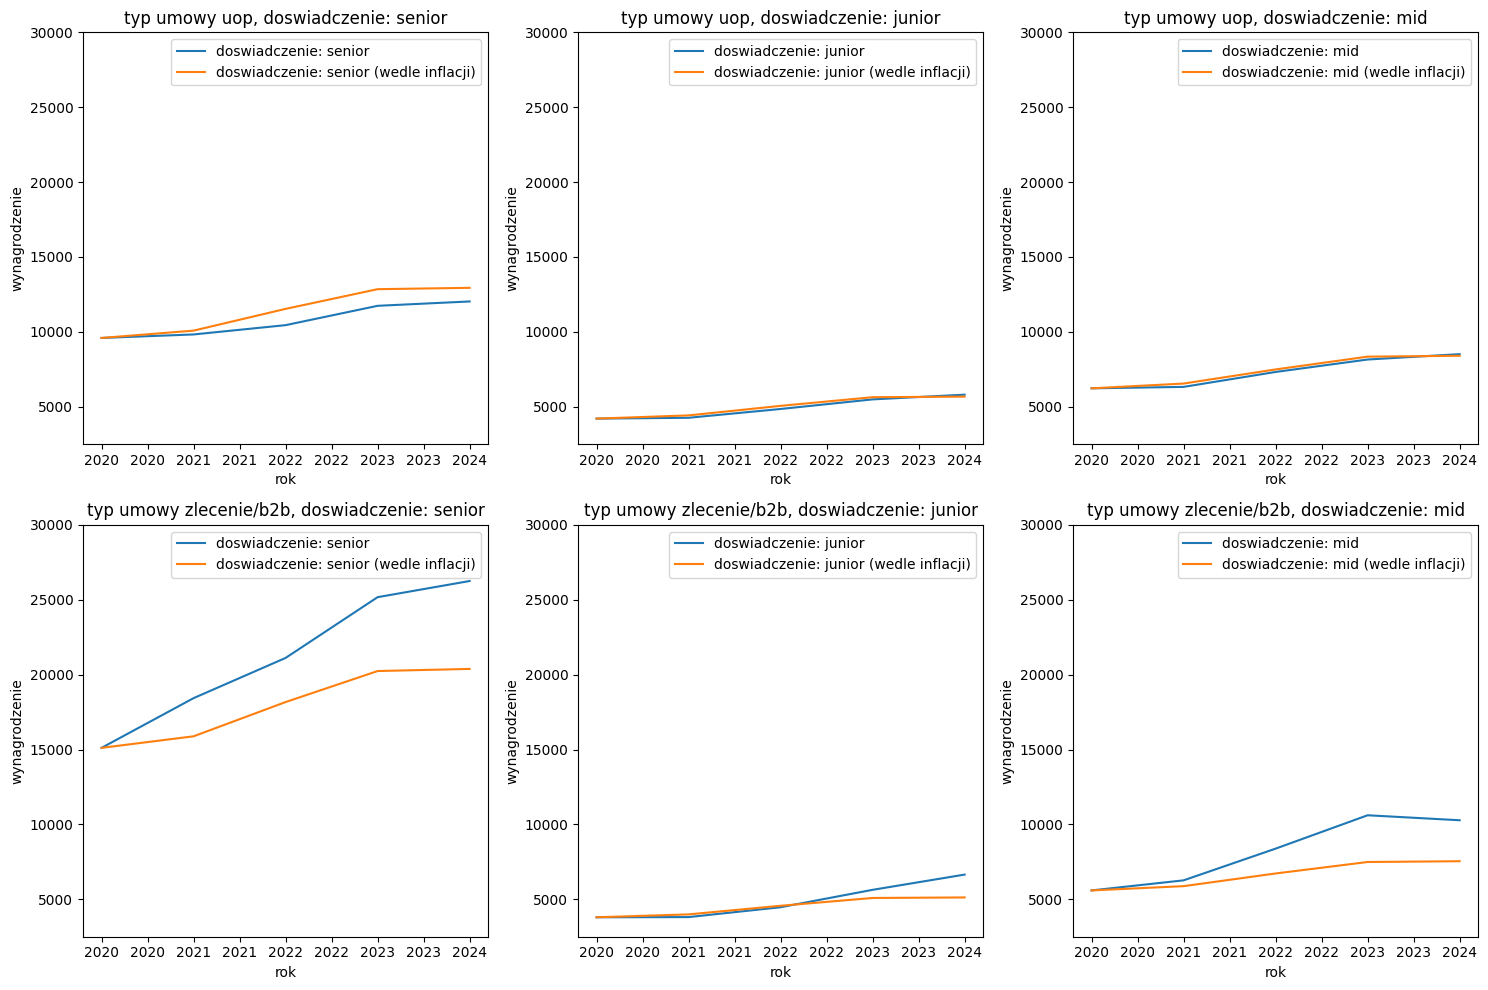

In [51]:
employement_types = datasets["Wynagrodzenie"]['typ umowy'].unique()
employement_experience = datasets["Wynagrodzenie"]['doswiadczenie'].unique()
data = datasets["Wynagrodzenie"]

fig, axs = plt.subplots(len(employement_types), len(employement_experience), figsize=(15, 10))  # Multiple rows and columns

inflation_prices = {}
for i, type in enumerate(employement_types):
    inflation_prices[type] = {}
    for j, experience in enumerate(employement_experience):
        type_experience_data = data[(data['typ umowy'] == type) & (data['doswiadczenie'] == experience)]
        year_value_dict = {
            year: value for year, value in zip(type_experience_data['rok'], type_experience_data['wartosc'])
        }
        earliest_price = year_value_dict[min(year_value_dict.keys())]
        for year, value in sorted(year_value_dict.items())[1:]:
            earliest_price = round(earliest_price * (inflation_dict[year] / 100), 2)
            year_value_dict[year] = earliest_price
        inflation_prices[type][experience] = year_value_dict

for i, type in enumerate(employement_types):
    for j, experience in enumerate(employement_experience):
        type_experience_data = data[(data['typ umowy'] == type) & (data['doswiadczenie'] == experience)]
        axs[i, j].plot(type_experience_data['rok'], type_experience_data['wartosc'], label=f'doswiadczenie: {experience}')
        axs[i, j].plot(list(inflation_prices[type][experience].keys()), list(inflation_prices[type][experience].values()), label=f'doswiadczenie: {experience} (wedle inflacji)')
        axs[i, j].set_xlabel('rok')
        axs[i, j].set_ylim(2500, 30000)  # Setting y-axis range
        axs[i, j].set_ylabel('wynagrodzenie')
        axs[i, j].set_title(f'typ umowy {type}, doswiadczenie: {experience}')
        axs[i, j].xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
        axs[i, j].legend()

plt.tight_layout()  # Adjust layout to prevent overlaps
plt.show()

#### Zywnosc

Lista produktoów: ['buraki za 1 kg' 'cebula za 1 kg' 'chleb pszenno-żytni za 0.5 kg'
 'cukier biały kryształ za 1 kg' 'filety z morszczuka mrożone za 1 kg'
 'jabłka za 1 kg' 'jaja kurze świeże za 1 szt'
 'kasza jęczmienna za 0.5 kg' 'kiełbasa wędzona za 1 kg'
 'kurczęta patroszone za 1 kg' 'marchew za 1 kg'
 'masło świeże o zawartości tłuszczu ok. 82,5% za 200 g'
 'mięso wieprzowe z kością (schab środkowy) za 1 kg'
 'mięso wołowe bez kości (z udźca) za 1 kg'
 'mięso wołowe z kością (rostbef) za 1 kg'
 'mleko krowie spożywcze o zawartości tłuszczu 3-3,5%, sterylizowane za 1 l'
 'mąka pszenna za 1 kg' 'olej rzepakowy produkcji krajowej za 1 l'
 'polędwica drobiowa za 1 kg' 'pomarańcze za 1 kg'
 'ser twarogowy półtłusty za 1 kg' 'sok jabłkowy za 1 l'
 'szynka wieprzowa gotowana za 1 kg' 'ziemniaki za 1 kg']


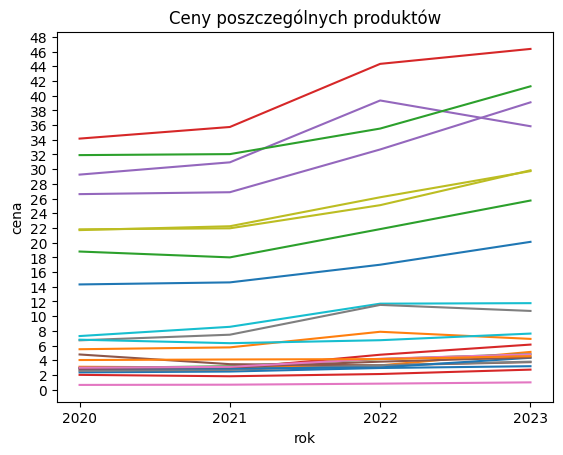

In [53]:
unique_foods = datasets["Zywnosc"]['nazwa_pozycja_2'].unique()

data = datasets["Zywnosc"]
print("Lista produktoów:", unique_foods)
for food in unique_foods:
    food_data = data[data['nazwa_pozycja_2'] == food]
    plt.plot(food_data['opis_okres'], food_data['wartosc'])
    plt.xlabel('rok')
    plt.ylabel('cena')
    plt.yticks(np.arange(0, 50, 2))
    plt.title('Ceny poszczególnych produktów')

Text(0.5, 1.0, 'Średnia cena produktów spożywczych')

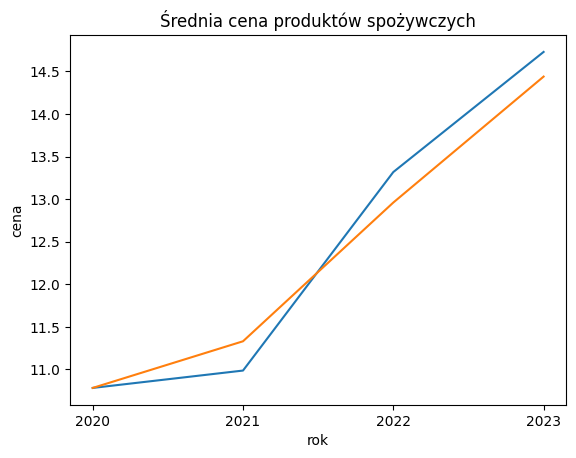

In [71]:
data = datasets["Zywnosc"]
average_data = data.groupby(['opis_okres'])['wartosc'].mean()

year_value_dict = {
    int(year): value for year, value in zip(average_data.index, average_data)
}

earliest_price = year_value_dict[min(year_value_dict.keys())]

for year, value in sorted(year_value_dict.items())[1:]:
    earliest_price = round(earliest_price * (inflation_dict[year] / 100), 2)
    year_value_dict[year] = earliest_price

plt.plot(food_data['opis_okres'], average_data)
plt.plot(food_data['opis_okres'], list(year_value_dict.values()))
plt.xlabel('rok')
plt.ylabel('cena')
plt.title('Średnia cena produktów spożywczych')